# <font color="#332E3C"><b>Cost Prediction for Logistic Company</b></font>

>**Team MU**
>
>- Camilo Florez        (C0888810)
>- Syed Zumair          (C0885081)
>- Karman Bains         (C0885084)
>- Mahaveersinh Chauhan (C0884854)
>- Joel Castro           (C0883863)
>- Manpreet Singh        (C0884727)


## Table of contents <a class="anchor" id="0.1"></a>

1. [Introduction](#1)
2. [Business Case Evaluation](#2)
3. [Data Identification](#3)<br>
4. [Prepare for Analysis](#4)<br>
    4.1 [Libraries](#4.1)<br>
    4.2 [General Functions](#4.2)
5. [Data Extraction](#5)
6. [Data Validation & Cleansing](#6)<br>
    6.1 [Duplicate Values](#6.1)<br>
    6.2 [Unique Values & Typographic Error](#6.2)<br>
    6.3 [Outliers](#6.3)<br>
    6.4 [Missing Values](#6.4)<br>
7. [Exploration Data Analysis](#7)
8. [Machine Learning Techniques](#8)<br>
    8.1[Split](#8.1)<br>
    8.2[Linear Regression](#8.2)<br>
    8.3[Random Forest Regressor](#8.3)<br>
    8.4[Gradient Boosting Regressor](#8.4)<br>
    8.5[XGB Booster](#8.5)
9. [Conclusion](#9)

[Back to Table of Contents](#0.1)
## Introduction <a class="anchor" id="1"></a>
As businesses increasingly rely on efficient and timely delivery of goods, logistics companies seek ways to optimize their delivery networks. They require accurate predictions of the costs associated with delivering packages across their network to achieve this. In this scenario, a logistics company has shared a dataset of network-wide deliveries and their corresponding trip costs. The task at hand is to build a model that can accurately predict the cost of deliveries, enabling the company to optimize its network and improve its overall efficiency.

[Back to Table of Contents](#0.1)
## Business Case Evaluation <a class="anchor" id="2"></a>

#### Problem definition
The prediction of the delivery cost is requested.

Evaluation Metric : RMSE Score

The file should contain a header and have the following format:
trip,cost
t333282728025, 23.3433

[Back to Table of Contents](#0.1)
## Data Identification <a class="anchor" id="3"></a>
The data contains information related to Logistic Company.<br><br>

|COLUMN| DESCRIPTION|
|:--|:--|
|Trip|Trip id|
|Date|Date, when trip was made|
|DayPart|Day or Night|
|ExWeatherTag|Heat/Snow|
|OriginLocation|Source location|
|DestinationLocation|Destination location|
|Distance|distance traveled|
|Type|Expedited or Not|
|Weight|weight carried by carriers|
|PackageType |Type of packages|
|carrier|Name of the carriers|


Datasets
Training data –Training dataset contains 38999 observations.
Actual responses (labels) are in the variable called ‘Cost’ Testing data – contains 802 observations with 11 variables and no labels

### Metadata 
Kaggel Competition<br>
**File descriptions**<br>
train.csv - the training Dataset<br>
test.csv - the test Dataset

[Back to Table of Contents](#0.1)
## Prepare for Data Analysis <a class="anchor" id="4"></a>

#### Import Libraries <a class="anchor" id="4.1"></a>

In [5]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import plotly.express as px
import time
from tqdm import tqdm
from sklearn.ensemble import IsolationForest
from sklearn import metrics
from scipy import stats
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import norm, skew
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# Ignore warning messages
warnings.filterwarnings('ignore')

# More columns the line
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

# static variables
order_months = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10,
                "November":11, "December":12}


#### General Functions <a class="anchor" id="4.2"></a>

Class created for creating the graph and define the basic functionality of the graph.

In [6]:
class Graphs:
    def __init__(self, title, x_rotation=None, x_fontsize=None, bar_rotation=None, bar_fontsize=None,
                 column_huge_name=None, legend_loc='upper left'):
        """Define Basic Functionality of the Graphs

        Args:
            title (String): Title of the Graph
            x_rotation (Int, optional): X Rotation of the Graph. Defaults to None.
            x_fontsize (Int, optional): Y Rotation of the Graph. Defaults to None.
            bar_rotation (Int, optional): Bar Rotation of the Graph. Defaults to None.
            bar_fontsize (Int, optional): Font size of the Graph. Defaults to None.
            column_huge_name (String, optional): Column Huge Name of the Graph. Defaults to None.
            legend_loc (String, optional): Legend Location of the Graph. Defaults to 'upper left'.
        """
        self.title = title
        self.x_rotation = x_rotation
        self.x_fontsize = x_fontsize
        self.bar_rotation = bar_rotation
        self.bar_fontsize = bar_fontsize
        self.column_huge_name = column_huge_name
        self.legend_loc = legend_loc
        
    def bar_plot(self, column_x, column_y, column_x_name, column_y_name, column_hue=None, order_x=None):
        """Plot Bar Graph
        Args:
            column_x (DataFrame): X-Bar of the Graph
            column_y (DataFrame): Y-Bar of the Graph
            column_x_name (String): Name of the X-Bar
            column_y_name (String): Name of the Y-Bar
            column_hue (String, optional): Column Hue of the Graph. Defaults to None.
            order_x (List of the String, optional): Order to plot the categorical levels in the Graph. Defaults to None.
        """
        fig, ax = plt.subplots(figsize=(15, 7))
        sns.barplot(x=column_x, y=column_y, hue=column_hue, order=order_x, ax=ax, errorbar=None)
        [ax.bar_label(cont, padding=3, fmt='%d', fontsize=self.bar_fontsize, rotation=self.bar_rotation) for cont in
         ax.containers]
        plt.xlabel(column_x_name)
        plt.ylabel(column_y_name)
        if column_hue is not None and self.column_huge_name is not None:
            plt.legend(title=self.column_huge_name, loc=self.legend_loc)
        plt.title(self.title, fontsize=12).set_position([0.5, 1.05])
        plt.xticks(rotation=self.x_rotation, fontsize=12)
        plt.show()

    @staticmethod
    def distribution_plot(data_filter, cols_num):
        """Plot the Distribution Graph

        Args:
            data_filter (DataFrame): Data for the Graph
            cols_num (List of String): Columns list for the Graph
        """
        fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
        fig.subplots_adjust(hspace=1)
        for i, col in enumerate(cols_num):
            sns.kdeplot(data=data_filter,x=col, shade=True, kernel='gau',color="Red", ax=axes[i], legend=True)
            axes[i].set_title(col)
            fig.tight_layout()

    def heat_map_corr(self, data):
        """Correlation heat map of the graph

        Args:
            data (DataFrame): Data for the Graph
        """
        plt.figure(figsize=(12, 8))
        plt.title(self.title, y=1.05,size=12)
        sns.heatmap(data, square=True, cmap='RdYlBu', linecolor="white", annot=True,annot_kws={"size": 7})
        plt.tight_layout()
        plt.show()

    def heatmap_nulls(self, data):
        """Graph of the Null value

        Args:
            data (DataFrame): Data for the Graph
        """
        ax = plt.axes()
        ax.xaxis.tick_top()
        sns.heatmap(data.isnull(), cbar=False, ax=ax)
        plt.title(self.title)
        plt.xlabel("Column")
        plt.ylabel("Quantity")
        plt.xticks(fontsize=9)
        plt.yticks(fontsize=6)
        plt.show() 
    

Function created for making the dummy variable of the categorical data.

In [7]:
def merge_dummy_data(data, column):
    """Create Dummy variable of the data and merge to original dataframe

    Args:
        data (DataFrame): Original Data
        column (String): Categorical Column of the Data

    Returns:
        DataFrame: Return Merged DataFrame
    """
    dummies = pd.get_dummies(data[column], prefix=column, dummy_na=False)
    merged_imputed = pd.concat([data, dummies], axis=1)
    merged_imputed.drop([column], axis=1, inplace=True)
    return merged_imputed

Function created to get the missing values

In [8]:
def missing_value(train):
   """Check Missing Value
   Args:
       train (DataFrame): Data to check missing value

   Returns:
       DataFrame: Return DataFrame which has summery of the missing value
   """
   obs = train.isnull().sum().sort_values(ascending = False)
   percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
   missing = pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])
   return missing

Function created to identify the outliers

In [9]:
def iden_outliers(df,cols_num):
    """Identify The Outlier of the Data

    Args:
        df (DataFrame): Data to find the outlier
        cols_num (String): Find the outlier for that particular column
    """
    fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(12,6))
    fig.subplots_adjust(hspace=1)
    for i, col in enumerate(cols_num):
        sns.boxplot(x=col,data=df,ax=ax[i])
        #ax[i].set_title(col)

Function created to analysis outliers

In [10]:
def outliers_analysis(df):
    """Get the Mean, Mode, Median and Standard Deviation of the data

    Args:
        df (DataFrame): Data that need to analysis the outlier
    """
    mean = np.mean(df_train_date[df])
    median = np.median(df_train_date[df])
    mode = stats.mode(df_train_date[df])
    std_dev = np.std(df_train_date[df])
    print("mean:",mean)
    print("median:",median)
    print("mode:",mode)
    print("standar desviation:",std_dev)

Function created for removing outlier using IQR algorithm

In [11]:
def iqr_outliers(df):
    """Apply the IQR outlier algorithm to remove the outlier

    Args:
        df (DataFrame): Data that need to remove outlier

    Returns:
        DataFramr: Filterd DataFrame
    """
    out = []
    if not any(df):
        return out
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > upper_tail or i < lower_tail:
            out.append(i)
    return out

Function created to transfor the categorical columns to numerical columns

In [12]:
def format_data_etiqueta(df,c):
    """Apply Label Encoder

    Args:
        df (DataFrame): Dataset
        c (Column): Column that needs to apply label encoder
    """
    le = LabelEncoder()
    df[c]= le.fit_transform(df[c])
    

Linear Regression Fuction

In [13]:
def linearregresion (X_train,y_train):
    """Apply Linear Regression Alogrithm

    Args:
        X_train (DataFrame): Train Dataset
        y_train (DataFrame): Target Dataset of the Train Dataset

    Returns:
        Object: Object of the Linear Regression Algorithm
    """
    reg = LinearRegression().fit(X_train, y_train)
    return reg

Random forest regressor function

In [14]:
def random_forest_regressor(x_train,y_train):
    """Apply Random Forest Regression Algorithm

    Args:
        X_train (DataFrame): Train Dataset
        y_train (DataFrame): Target Dataset of the Train Dataset

    Returns:
        Object: Object of the Linear Regression Algorithm
    """
    try:
        rfr = RandomForestRegressor(random_state=0)
        rfr.fit(x_train, y_train)
        return rfr
    except Exception as ex:
        return None

Function created for get the data metrics 

In [15]:
def model_error(y_test,y_pred):
    """Check the model performance

    Args:
        y_test (DataFrame): Test Dataset
        y_pred (DataFrame): Predicted Dataset
    """
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    performance = r2 - mse
    print("performance: ", performance)
    print("MAE: ", mae)
    print("R2: ", r2)
    print("MSE: ", mse)
    print("RMSE: ", np.sqrt(mse))

Function created to find the best hyperparameters using GridSearchCV

In [16]:
def grid_search_cv(model: object, param_grid: dict, X_train: object, y_train: object) -> object:
    """Get the best hyperparameter to the model

    Args:
        model (object): initial model
        param_grid (dict): hyperparameters dict
        X_train (object): Train Dataset
        y_train (object): Target Dataset

    Returns:
        object: Model with Best estimator
    """
    gs = GridSearchCV(model, param_grid, cv=3, scoring="neg_mean_squared_error", refit=True, n_jobs= -1) 
    gs.fit(X_train, y_train)
    best_params = gs.best_params_
    best_estimators = gs.best_estimator_

    # Print the best params
    print('Best Params: ', best_params)
    # Print the best estimators
    print('Best Estimators', best_estimators)
    # Print the accuracy score
    print('Accuracy Score:', best_estimators.score(X_train, y_train))
    
    return best_estimators

Function created to find best hyperparameter using RandomizedSearchCV

In [17]:
def randomized_search_cv(model: object, param_grid: dict,  X_train: object, y_train: object, n_iter: int = 20, verbose: int = 2) -> object:
    """Get the best hyperparameter to the model

    Args:
        model (object): initial model
        param_grid (dict): hyperparameters dict
        X_train (object): Train Dataset
        y_train (object): Target Dataset
        n_iter (int, optional): number of iterations. Defaults to 25.
        verbose (int, optional): verbose. Defaults to 2.

    Returns:
        object: model with best estimators
    """
    rnd_search_cv = RandomizedSearchCV(model, param_grid, n_iter=n_iter,scoring='neg_mean_absolute_error',verbose=verbose,cv = 3, n_jobs=-1)
    rnd_search_cv.fit(X_train, y_train)
    # Get the best estimator on Randomized SearchCV
    best_estimators = rnd_search_cv.best_estimator_

    # Print the best estimators
    print('Best Estimators', best_estimators)    
    # Print the accuracy score
    print('Accuracy Score:', rnd_search_cv.score(X_train, y_train))
    
    return best_estimators

Function created to identify the importance columns (Model with coef)

In [18]:
def feature_importance_lineal(model: object, X_train: object) -> None:
    """Get the list of feature importance

    Args:
        model (object): initial model
        X_train (object): Train Dataset
    """
    for name, score in sorted(zip(X_train.columns, model.coef_), key=lambda x: x[1], reverse=True):
        if score == 0:
            break
        print("Column:", name, "\t Score:", score)

Function created to identify the importance columns (Model with feature importances)

In [19]:
def feature_importance(model: object, X_train: object) -> None:
    """Get the list of feature importance

    Args:
        model (object): initial model
        X_train (object): Train Dataset
    """
    for name, score in sorted(
            zip(X_train.columns, model.feature_importances_), key=lambda x: x[1], reverse=True): 
        if score == 0:
            break
        print("Column:", name, "\t Score:", score)

Function to export the results

In [20]:
def export_result (y,df,name):
    """Save CSV File of the predicted result

    Args:
        y (DataFrame): Predicted Value of the Data
        df (DataFrame): Original Test DataFrame
        name (String): Name of the CSV File
    """
    result = pd.DataFrame(y, columns=["cost"])
    df_test_target = pd.concat([result, df["trip"]], axis=1)
    test = df_test_target[["trip", "cost"]]
    test.to_csv(name + ".csv", index=0)

Function to get the Epoch time

In [21]:
def date_to_epoch(date):
    """Epoch Time

    Args:
        date (object): Date parameter
   """
    epoch = datetime.utcfromtimestamp(0)
    return int((date - epoch).total_seconds())

##### [Back to Table of Contents](#0.1)
## Data Extraction <a class="anchor" id="5"></a>
Read the train and test Datasets.

In [22]:
# Reading the training and test dataset
df_train = pd.read_csv('/kaggle/input/cost-prediction-for-logistic-company-2023w-aml1413/train.csv')
df_test = pd.read_csv('/kaggle/input/cost-prediction-for-logistic-company-2023w-aml1413/test.csv')

Get the first 5 and the last 5 rows of the train dataset to have an idea of how the data is presented.

In [23]:
df_train.head()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777


In [24]:
df_train.tail()

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
38994,t11845608590,2019-10-17,night,NaN,S3,D3,1200,NaN,3,NaN,B,14.987239
38995,t53557166488,2019-01-23,night,NaN,S4,D6,2000,NaN,6,NaN,B,33.214738
38996,t337474787136,2018-10-03,night,NaN,S8,D7,3000,NaN,24,NaN,B,45.172159
38997,t76488353326,2018-02-26,night,NaN,S8,D5,2600,NaN,31,NaN,B,47.541427
38998,t33300084668,2017-07-30,night,NaN,S8,D8,3200,NaN,36,NaN,B,68.054098


According to the first and last 5 columns, there are some NaN data to clean.

Get the shape of train and test dataset

In [25]:
print('The shape of the train dataset and test dataset is:', df_train.shape, df_test.shape)

The shape of the train dataset and test dataset is: (38999, 12) (802, 11)


Get the basic datasets information to check the data types.

In [26]:
print("Train Info")
df_train.info()

Train Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip                 38999 non-null  object 
 1   date                 38999 non-null  object 
 2   dayPart              38999 non-null  object 
 3   exWeatherTag         4882 non-null   object 
 4   originLocation       38999 non-null  object 
 5   destinationLocation  38999 non-null  object 
 6   distance             38999 non-null  int64  
 7   type                 3748 non-null   object 
 8   weight               38999 non-null  int64  
 9   packageType          2500 non-null   object 
 10  carrier              38999 non-null  object 
 11  cost                 38999 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ MB


In [27]:
print("Test Info")
df_test.info()

Test Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   trip                 802 non-null    object
 1   date                 802 non-null    object
 2   dayPart              802 non-null    object
 3   exWeatherTag         101 non-null    object
 4   originLocation       802 non-null    object
 5   destinationLocation  802 non-null    object
 6   distance             802 non-null    int64 
 7   type                 73 non-null     object
 8   weight               802 non-null    int64 
 9   packageType          52 non-null     object
 10  carrier              802 non-null    object
dtypes: int64(2), object(9)
memory usage: 69.0+ KB


#### Data Types
From the above:

There are 8 Categorical features:

trip:                Ordinal category<br>
dayPart:             Binary category<br>
exWeatherTag:        Binary category<br>
originLocation:      Ordinal category<br>
type:                Binary category<br>
packageType:         Ordinal category<br>
carrier:             Nominal category<br>
destinationLocation: Ordinal category

There is 1 Date type

There are 3 numeric features:
weight:   Numeric Discret<br>
cost:     Numeric Continuous<br>
distance: Numeric Continuous<br>

[Back to Table of Contents](#0.1)
## Data Validation & Cleansing <a class="anchor" id="6"></a>

#### Describe

Initial analysis to identify minimum, maximum, standard, and quartile values for each column. There are important data to take into account, such as:
- There are two columns with unique value.
- The mean price is 80.97 for every delivery. However, the min and max prices show possible outliers affecting the mean.
- Possibly there are misleading values according to the number of records in the columns, type, packagetype and exweathertag.

In [28]:
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
trip,38999,38999,t52712528,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,38999,1074,2019-05-20,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayPart,38999,2,night,25904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exWeatherTag,4882,2,snow,3286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
originLocation,38999,9,S3,4461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destinationLocation,38999,9,D8,4471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance,38999.0,NaN,NaN,NaN,2004.061643,728.996843,400.0,1400.0,2000.0,2600.0,3600.0
type,3748,1,expedited,3748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,38999.0,NaN,NaN,NaN,42.293033,75.473752,1.0,13.0,25.0,39.0,500.0
packageType,2500,1,TT,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
trip,802,802,t333282728025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,802,571,2018-04-25,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayPart,802,2,night,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exWeatherTag,101,2,snow,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
originLocation,802,9,S2,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destinationLocation,802,9,D9,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance,802.0,NaN,NaN,NaN,1986.533666,744.194815,400.0,1400.0,2000.0,2600.0,3600.0
type,73,1,expedited,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,802.0,NaN,NaN,NaN,43.205736,80.08428,1.0,12.0,24.0,39.0,494.0
packageType,52,1,TT,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Date attribute is transformed

The date column is changed to date format, the Day,Month and epoch time columns are also created. 

In [30]:
# copy of the data train and data test are created
df_train_date=  df_train.copy()
df_test_date=  df_test.copy()

# Set Date column as a datetime data type
# Train Dataset
df_train_date["date"] = df_train["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_train_date["date"] = df_train["date"].astype("datetime64[ns]")
df_train_dat = np.vstack(df_train['date'].astype(str).apply(lambda x:list(map(int,x.split('-')))).values)

df_train_date['Year'] = df_train_dat[:,0]
df_train_date['Monthn']= df_train_dat[:,1]
df_train_date['Dayn'] = df_train_dat[:,2]
df_train_date['Day'] = df_train_date["date"].dt.day_name()
df_train_date['Month'] = df_train_date["date"].dt.month_name()
df_train_date['epoch_times'] = df_train_date['date'].apply(lambda x: date_to_epoch(x))

# Test Dataset
df_test_date["date"] = df_test["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_test_date["date"] = df_test["date"].astype("datetime64[ns]")
df_test_dat = np.vstack(df_test['date'].astype(str).apply(lambda x:list(map(int,x.split('-')))).values)

df_test_date['Year'] = df_test_dat[:,0]
df_test_date['Monthn']= df_test_dat[:,1]
df_test_date['Dayn'] = df_test_dat[:,2]
df_test_date['Day'] = df_test_date["date"].dt.day_name()
df_test_date['Month'] = df_test_date["date"].dt.month_name()
df_test_date['epoch_times'] = df_test_date['date'].apply(lambda x: date_to_epoch(x))


The change made is verified

In [31]:
df_train_date

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost,Year,Monthn,Dayn,Day,Month,epoch_times
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152,2017,9,6,Wednesday,September,1504656000
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649,2017,10,21,Saturday,October,1508544000
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939,2017,7,15,Saturday,July,1500076800
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087,2017,10,22,Sunday,October,1508630400
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777,2019,12,11,Wednesday,December,1576022400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,t11845608590,2019-10-17,night,NaN,S3,D3,1200,NaN,3,NaN,B,14.987239,2019,10,17,Thursday,October,1571270400
38995,t53557166488,2019-01-23,night,NaN,S4,D6,2000,NaN,6,NaN,B,33.214738,2019,1,23,Wednesday,January,1548201600
38996,t337474787136,2018-10-03,night,NaN,S8,D7,3000,NaN,24,NaN,B,45.172159,2018,10,3,Wednesday,October,1538524800
38997,t76488353326,2018-02-26,night,NaN,S8,D5,2600,NaN,31,NaN,B,47.541427,2018,2,26,Monday,February,1519603200


#### Duplicate Values <a class="anchor" id="6.1"></a>
No duplicate values


In [32]:
df_train_date[df_train_date["trip"].isin(df_train_date[df_train_date.duplicated()]["trip"].values)]

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost,Year,Monthn,Dayn,Day,Month,epoch_times


#### Unique Values and typographic error <a class="anchor" id="6.2"></a>

There are no typographical errors or redundancy in the name of the variables. It is observed the column type and packagetype have only 1 level or value, so they must be taken into consideration and evaluated.

In [33]:
cols_cat = ['dayPart', 'exWeatherTag', 'originLocation','destinationLocation', 'carrier', 'type', 'packageType']
for col in cols_cat:
    print(f'Column {col}:{df_train_date[col].nunique()} categories')
    print(df_train_date[col].value_counts().index.tolist())


Column dayPart:2 categories
['night', 'day']
Column exWeatherTag:2 categories
['snow', 'heat']
Column originLocation:9 categories
['S3', 'S5', 'S6', 'S8', 'S4', 'S1', 'S9', 'S7', 'S2']
Column destinationLocation:9 categories
['D8', 'D3', 'D9', 'D2', 'D5', 'D7', 'D1', 'D6', 'D4']
Column carrier:4 categories
['B', 'D', 'C', 'A']
Column type:1 categories
['expedited']
Column packageType:1 categories
['TT']


#### Identify Outliers <a class="anchor" id="6.3"></a>

The identification of outliers is carried out by means of box plots and the histogram for the numerical variables.
Boxplots are a useful graphical tool for identifying outliers,show the distribution of data in terms of the median, quartiles, and extreme values.

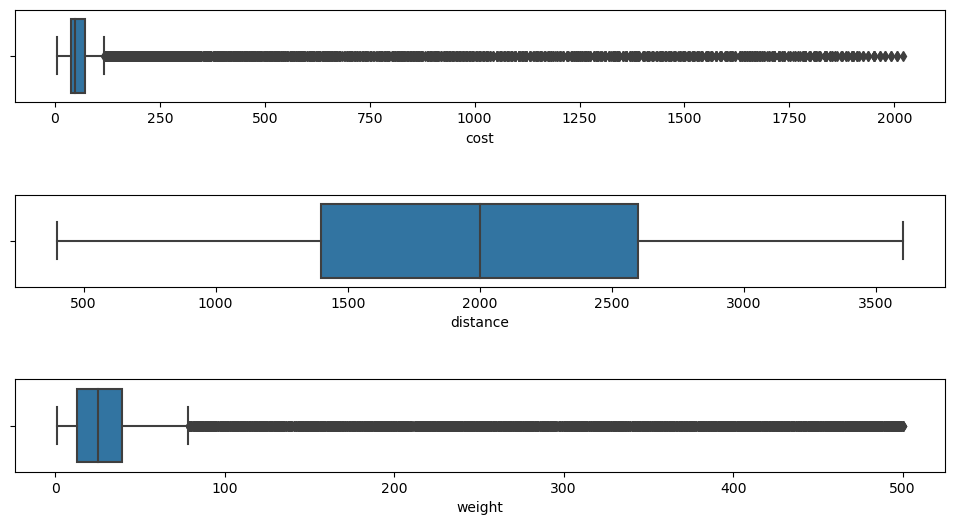

In [34]:
cols_num = ['cost','distance','weight']
iden_outliers(df_train_date,cols_num)

Distribution plots serve to complement the information provided by a boxplot. A distribution plot shows the shape and symmetry of the data distribution, which can be helpful in identifying patterns that are not apparent on a boxplot.

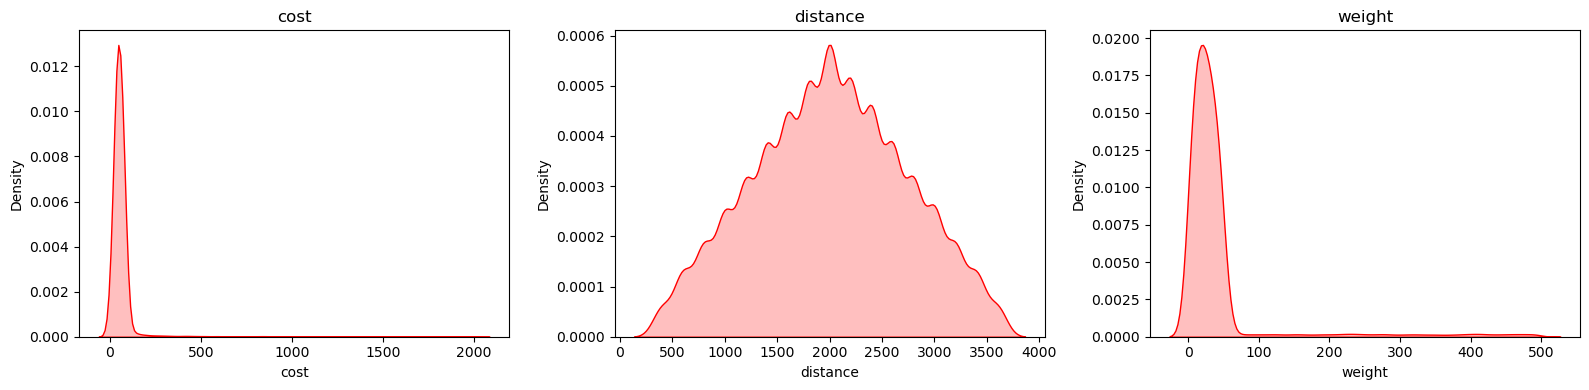

In [35]:
Graphs.distribution_plot(df_train_date,cols_num)

Within the analysis developed at this point of the numerical variables Cost, distance and weight, the following observations can be made:

Cost

###### - The mean (80.97) is greater than the median (46.47), which suggests that the distribution be skewed to the right.
###### - The mode of the distribution is 63, which means that this value is the most common in the sample. This value is not equal to the mean or median, which also suggests an asymmetry in the distribution.
###### - The standard deviation (180.71) is relatively high compared to the mean. It may have outliers.

In [36]:
print("Analysis cost")
outliers_analysis("cost")

Analysis cost
mean: 80.97221023324848
median: 46.46847625
mode: ModeResult(mode=array([63.]), count=array([773]))
standar desviation: 180.71273805035986


Weight

###### - The mean (42.29) is greater than the median (25), which suggests that the distribution be skewed to the right.
###### - The mode (mode) is much smaller than the mean and median. which also suggests an asymmetry in the distribution. 
###### - The standard deviation (180.71) is relatively high compared to the mean.It may have outliers.

In [37]:
print("Analysis weight")
outliers_analysis("weight")

Analysis weight
mean: 42.293033154696275
median: 25.0
mode: ModeResult(mode=array([12]), count=array([846]))
standar desviation: 75.47278391413177


Distance

###### - For this case, the data suggest that most of the samples are within the range of 1,000 to 3,000 kilometers, with a mean and median that are close to that range. The fact that the mode is also in this range indicates that there is a high concentration of values around this distance.

In [38]:
print("Analysis distance")
outliers_analysis("distance")

Analysis distance
mean: 2004.0616426062206
median: 2000.0
mode: ModeResult(mode=array([2000]), count=array([4436]))
standar desviation: 728.9874969660792


##### As we see above, Cost, Distance and Weight column has outlier. But these all columns are related to target variable so we can not remove it.

#### Ouliers imputation

This part is for experimentation.

Based on general observations, we might consider using outlier detection techniques that focus on identifying outliers in the right tail of the distribution for the cost, and weight columns, since the mean is greater than the median and the distribution is skewed to the right. Therefore, the technique "interquartile range rule (IQR)" could be used. This technique is useful when the distribution is not symmetric and has long tails in one direction.


In [39]:
df_train_without_Outliers =  df_train_date.copy()

We called the function to find the outliers with the IQR technique

In [40]:
outliers_cost = iqr_outliers(df_train_without_Outliers["cost"])
outliers_weight = iqr_outliers(df_train_without_Outliers["weight"])

The imputation of the outliers was made

In [41]:
#calculate the median
median_cost = np.median(df_train_without_Outliers['cost'])
median_cost = np.median(df_train_without_Outliers['weight'])
# Impute outliers with the median
df_train_without_Outliers['cost'].replace(outliers_cost, median_cost, inplace=True)
df_train_without_Outliers['weight'].replace(outliers_weight, median_cost,inplace=True)



A distribution graph was made to see the behavior after imputing the outliers.

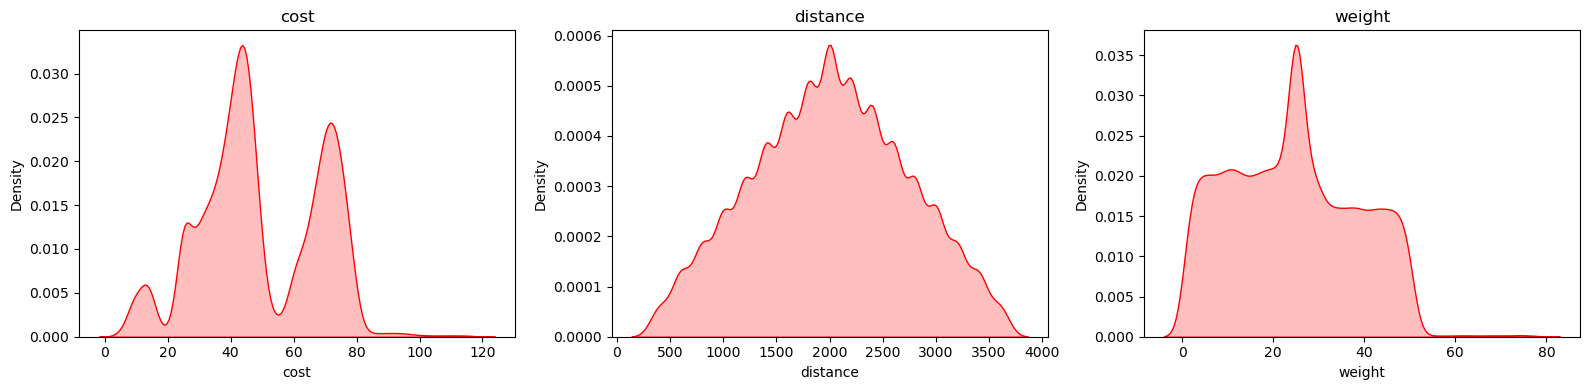

In [42]:
Graphs.distribution_plot(df_train_without_Outliers,cols_num)

#### Missing Values <a class="anchor" id="6.4"></a>

This step identifies the percentage and quantity of missing values for each column. For this case, the columns type, packagetype and exWeathertag have 93.52%, 90.90% and 87.41% of missing values.

In [43]:
# Missing Values train
missing_value(df_test_date)

,Number of Observations,Percent
packageType,750,93.52
type,729,90.90
exWeatherTag,701,87.41
trip,0,0.00
carrier,0,0.00
Month,0,0.00
Day,0,0.00
Dayn,0,0.00
Monthn,0,0.00
Year,0,0.00


In [44]:
# Missing Values train
missing_value(df_train_date)

,Number of Observations,Percent
packageType,36499,93.59
type,35251,90.39
exWeatherTag,34117,87.48
carrier,0,0.00
Month,0,0.00
Day,0,0.00
Dayn,0,0.00
Monthn,0,0.00
Year,0,0.00
cost,0,0.00


Function heatmap_nulls is created to show a heat map about nulls in all data frames. With this process, the goal is to identify the columns that are not relevant to the business problem.

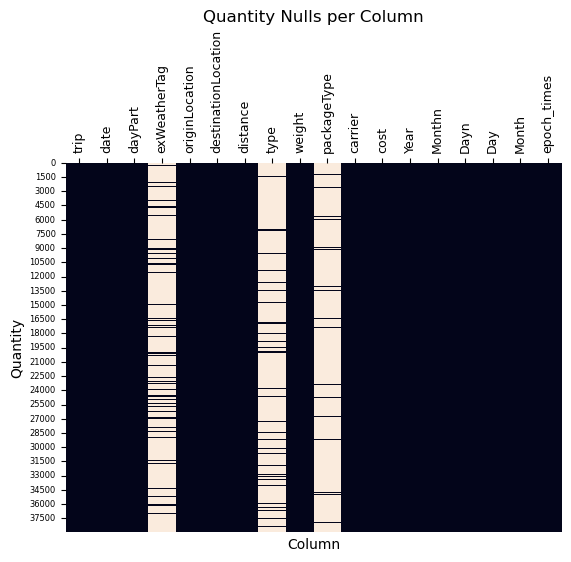

In [45]:
Graphs("Quantity Nulls per Column").heatmap_nulls(df_train_date)

A copy of the dataset was created to analyze the data

In [46]:
df_EDA = df_train_date.copy()

##### 'Type' Column - We fill 'Not' in the missing value. Because according to the dataset discription we have only two category for the Type column.

In [47]:
# type variable
df_train_without_Outliers['type'] = df_train_without_Outliers['type'].fillna('Not')
df_train_date['type'] = df_train_date['type'].fillna('Not')
df_EDA['type'] = df_train_date['type'].fillna('Not')
df_test_date['type'] = df_test_date['type'].fillna('Not')

##### 'packageType' Column - We fill 'standard' in the missing value.


In [48]:
# packagetype variable
df_train_without_Outliers['packageType'] = df_train_without_Outliers['packageType'].fillna('standar')
df_train_date['packageType'] = df_train_date['packageType'].fillna('standar')
df_EDA['packageType'] = df_train_date['packageType'].fillna('standar')
df_test_date['packageType'] = df_test_date['packageType'].fillna('standar')

##### 'exWeatherTag' Column - According the dataset, only 6(June) month have 'heat' value in the dataset. And 12(december) month have 'snow' value in the dataset. So we assume that from the January to June we put 'heat' and from the July to December we put 'snow'.


In [49]:
# exweather variable
df_train_without_Outliers['exWeatherTag'] = df_train_date['Monthn'].apply(lambda x: 'heat' if x<= 6 else 'snow') 
df_train_date['exWeatherTag'] = df_train_date['Monthn'].apply(lambda x: 'heat' if x<= 6 else 'snow') 
df_EDA['exWeatherTag'] = df_train_date['Monthn'].apply(lambda x: 'heat' if x<= 6 else 'snow') 
df_test_date['exWeatherTag'] = df_train_date['Monthn'].apply(lambda x: 'heat' if x<= 6 else 'snow')

In [50]:
df_EDA

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost,Year,Monthn,Dayn,Day,Month,epoch_times
0,t52712528,2017-09-06,night,snow,S4,D7,2200,expedited,50,standar,D,68.413152,2017,9,6,Wednesday,September,1504656000
1,t29859381,2017-10-21,night,snow,S8,D1,1800,Not,12,standar,B,36.450649,2017,10,21,Saturday,October,1508544000
2,t25702332,2017-07-15,night,snow,S9,D5,2800,Not,1,standar,B,9.057939,2017,7,15,Saturday,July,1500076800
3,t27713405,2017-10-22,day,snow,S9,D7,3200,Not,50,standar,C,57.320087,2017,10,22,Sunday,October,1508630400
4,t49439220,2019-12-11,day,snow,S9,D1,2000,Not,43,standar,B,77.263777,2019,12,11,Wednesday,December,1576022400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,t11845608590,2019-10-17,night,snow,S3,D3,1200,Not,3,standar,B,14.987239,2019,10,17,Thursday,October,1571270400
38995,t53557166488,2019-01-23,night,heat,S4,D6,2000,Not,6,standar,B,33.214738,2019,1,23,Wednesday,January,1548201600
38996,t337474787136,2018-10-03,night,snow,S8,D7,3000,Not,24,standar,B,45.172159,2018,10,3,Wednesday,October,1538524800
38997,t76488353326,2018-02-26,night,heat,S8,D5,2600,Not,31,standar,B,47.541427,2018,2,26,Monday,February,1519603200


[Back to Table of Contents](#0.1)
###  Exploration Data Analysis <a class="anchor" id="7"></a>

Convert categorical variables to numeric

In [51]:
cat_format = ['dayPart','exWeatherTag','originLocation','destinationLocation','type','packageType','carrier']
for var in cat_format:
    format_data_etiqueta(df_EDA,var)
    format_data_etiqueta(df_EDA,var)


#### Correlation of Features
According to the correlation matrix of the dataset, different variables with high correlations can be evidenced, such as: the distance variable with originLocation and destinationLocation. With respect to our target, this has a correlation of 0.86 with the weight and -0.66 with packageType, also a minor correction of 0.23 with the carrier variable.

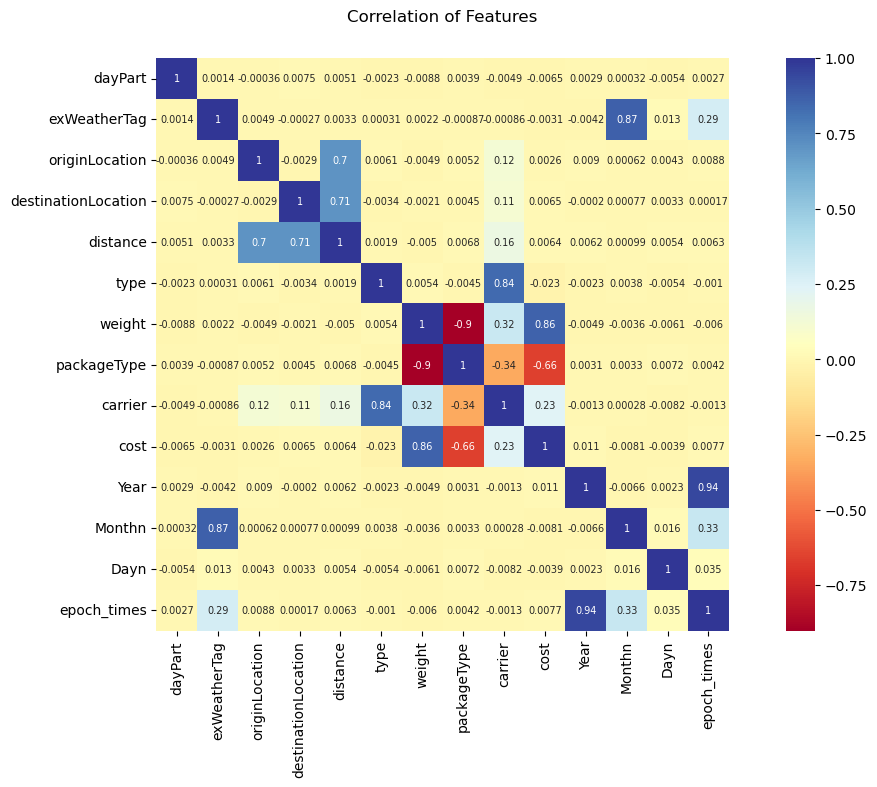

In [52]:
Graphs("Correlation of Features").heat_map_corr(df_EDA.corr())

We plot a list of the variables from highest to lowest correlation with the target

In [53]:
corr = df_EDA.corr()
corr[['cost']].sort_values(by = 'cost',ascending = False)\
.style.background_gradient()

,cost
cost,1.000000
weight,0.859548
carrier,0.232356
Year,0.011036
epoch_times,0.007672
destinationLocation,0.006504
distance,0.006427
originLocation,0.002563
exWeatherTag,-0.003056
Dayn,-0.003918


##### Graph: Distance and (Mean cost)
The graph is made in order to know the relationship between distance and cost. As can be seen, the variation of the distance does not have a great significance within the cost.

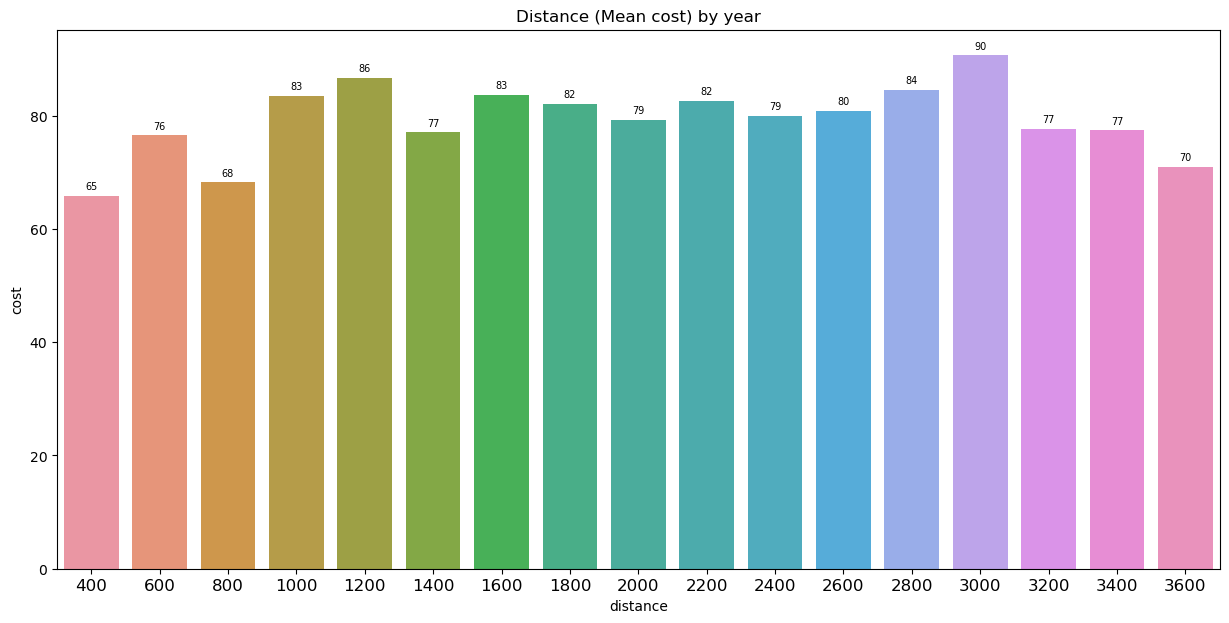

In [54]:
df_graph = df_train_date[["cost", "distance"]]
df_graph = df_graph.groupby([ "distance"], as_index=False)["cost"].mean()
Graphs("Distance (Mean cost) by year", bar_fontsize=7, x_rotation=0, bar_rotation=0,
              column_huge_name="Year", legend_loc="best").bar_plot(df_graph['distance'],
                                                                           df_graph['cost'],
                                                                           "distance", "cost")

##### Graph: Media Cost by Month and year
In order to obtain data about the variation of the cost in the course of the months and years, the graph is made. The graph shows a variation in the price in the different months, being January the month with the highest cost, in turn it can be seen that as the years go by, the cost increases between 2 and 3%

In [55]:
df_graph = df_train_date[["cost", "Month",'Year']]
df_graph = df_graph.groupby(["Month",'Year'], as_index=False)["cost"].mean()
df_graph.sort_values(by="Month", inplace=True, key=lambda x: x.map(order_months))
fig = px.line(df_graph, x="Month", y="cost", color = 'Year')
fig.update_layout(title=dict(text="Cost (mean) per year", font=dict(size=20), yref='paper'))
fig.show()

#### Cost (mean) vs dayPart per Year

This graph is highlighted in order to observe the relationship over the years between the cost and daypart variables. There is no evidence of a significant relationship or a variation in the cost more than the one that normally increases per year.


In [56]:
df_graph = df_train_date[["cost", "dayPart",'Year']]
df_graph = df_graph.groupby(["dayPart",'Year'], as_index=False)["cost"].mean()
df_graph.sort_values(by="dayPart", inplace=True, key=lambda x: x.map(order_months))
fig = px.bar(df_graph, x="dayPart", y="cost", color = 'Year')
fig.update_layout(title=dict(text="Cost (mean) vs dayPart per Year", font=dict(size=20), yref='paper'))
fig.show()

##### Carrier (Mean cost) by Month 
Cost of the Carrier Type 'C' is very high as compared to the other Types.
The behavior of the variables in the different months is similar with the exception of variable C, which stands out for having the highest cost mean.

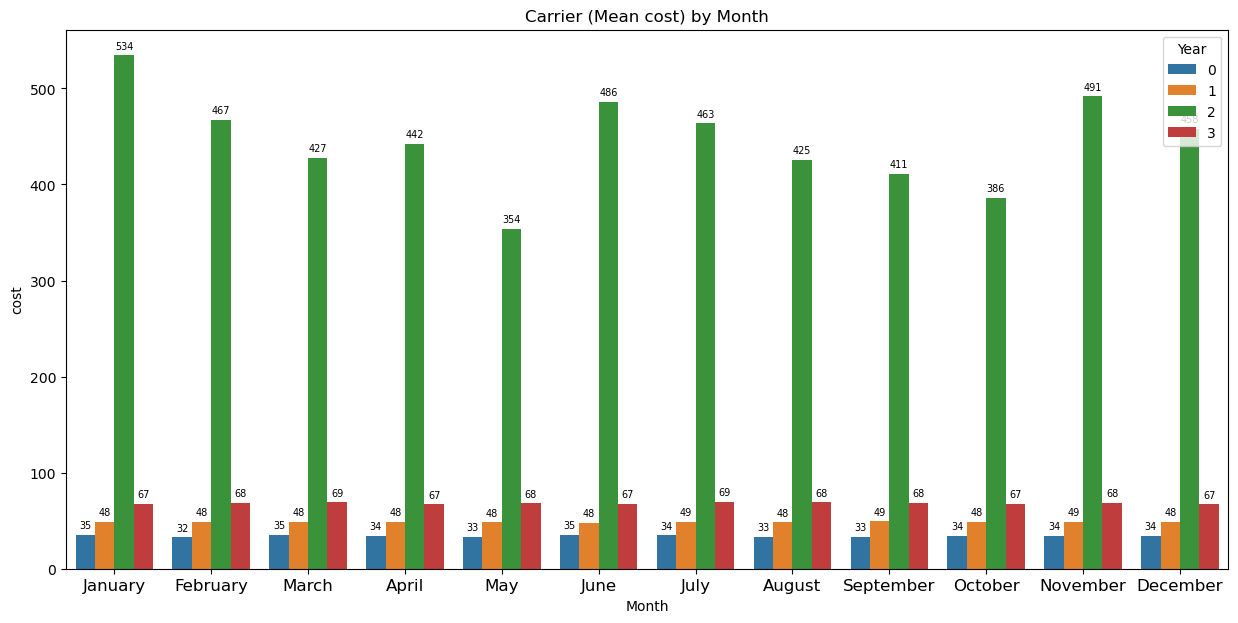

In [57]:
df_graph = df_EDA[["cost", "carrier", "Month"]]
df_graph = df_graph.groupby(["carrier", "Month"], as_index=False)["cost"].mean()
Graphs("Carrier (Mean cost) by Month", bar_fontsize=7, x_rotation=0, bar_rotation=0,
              column_huge_name="Year", legend_loc="best").bar_plot(df_graph['Month'],
                                                                           df_graph['cost'],
                                                                           "Month", "cost", df_graph["carrier"],order_months)

##### Weight(mean) vs packageType
According to the graph, there is a relationship between the packageType and weight column where the highest concentration of data is found in the TT variable with an average weight of 302.

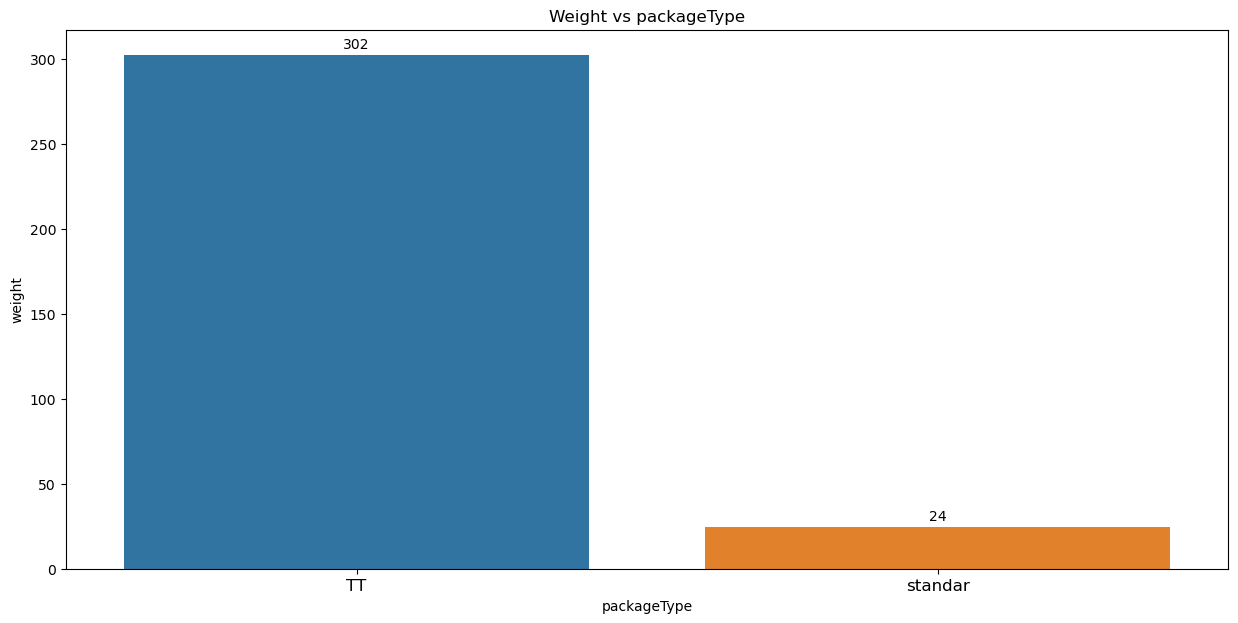

In [58]:
df_graph = df_train_date[["weight", "packageType"]]
df_graph = df_graph.groupby(["packageType"], as_index=False)["weight"].mean()
Graphs("Weight vs packageType").bar_plot(df_graph['packageType'], df_graph['weight'], "packageType", "weight")

##### Distribution Between Cost and Weight by type
This graph is made in order to see the relationship between the variables weight cost and type. In this graph, two different behaviors are observed, one linear and the other exponential, the latter starting from the weight of 200. In turn, it is observed that the type variable has a fairly close relationship between the exponential graph. From the above, it can be deduced that there is a close relationship between the weight and cost variable without mentioning that the type variable has a particular behavior in the price increase.

In [59]:
fig_px = px.scatter(df_train_date, "weight", "cost",color = "type",title="Distribution Between Cost and Weight by type ")
fig_px.update_coloraxes(showscale=False)
fig_px.show()

##### Carrier (Mean cost) by exWeatherTag.
Cost of the Carrier Type ‘C’ is very high as compared to the other Types. Also the relation of weathertag is not changing with the carrier column 

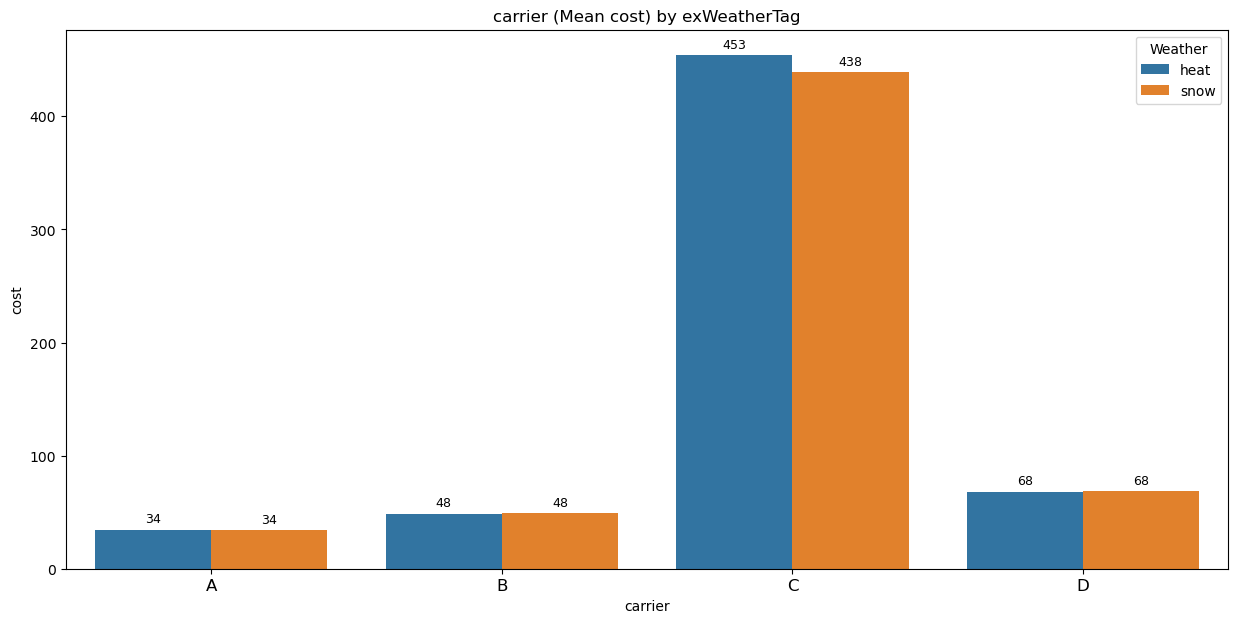

In [60]:
df_graph = df_train_date[["cost", "exWeatherTag", "carrier"]]
df_graph = df_graph.groupby(["exWeatherTag", "carrier"], as_index=False)["cost"].mean()
Graphs("carrier (Mean cost) by exWeatherTag", bar_fontsize=9, x_rotation=0, bar_rotation=0,
              column_huge_name="Weather", legend_loc="best").bar_plot(df_graph['carrier'],
                                                                           df_graph['cost'],
                                                                           "carrier", "cost", df_graph["exWeatherTag"])

In [61]:
del df_EDA

The initial correlation is created to understand which fields are valuable for solving the problem definition (cost). Initially, it is notable that year, parking assist, alloy wheels, and transmission have a bit of relevance. Nevertheless, the other columns are categorical. Those could be more accurate once they become to numerical. As a result, it is necessary cleaning the data.

[Back to Table of Contents](#0.1)
### Machine Learning Techniques <a class="anchor" id="8"></a>

There is a defined linear regression,Random Fores Regressor,Gradient Boosting Regressor and XGB Regressor to check the accuracy.

##### We have dropped the unnecessary column for the training the model

In [62]:
X1 = df_train_date.drop(columns=['cost','date','trip','Day','Month','Dayn','Monthn','Year','dayPart',
                                 'Dayn','Monthn','type','originLocation','destinationLocation'])
y1 = df_train_date['cost']
t1 = df_test_date.drop(columns=['date','trip','Day','Month','Year','dayPart',
                                'Dayn','Monthn','Dayn','Monthn','type','originLocation','destinationLocation'])

Check the dataframe 

In [63]:
X1

,exWeatherTag,distance,weight,packageType,carrier,epoch_times
0,snow,2200,50,standar,D,1504656000
1,snow,1800,12,standar,B,1508544000
2,snow,2800,1,standar,B,1500076800
3,snow,3200,50,standar,C,1508630400
4,snow,2000,43,standar,B,1576022400
...,...,...,...,...,...,...
38994,snow,1200,3,standar,B,1571270400
38995,heat,2000,6,standar,B,1548201600
38996,snow,3000,24,standar,B,1538524800
38997,heat,2600,31,standar,B,1519603200


##### Create the dummy variable of the categorical data.

In [64]:
#Format Data

#Train
cat_format_onehot = ['carrier','exWeatherTag','packageType']
#cat_format_onehot = ['originLocation','destinationLocation','type','packageType','carrier','exWeatherTag']
for var in cat_format_onehot:
    X1 = merge_dummy_data(X1,var)

#Test
for var in cat_format_onehot:
    t1 = merge_dummy_data(t1,var)

In [65]:
X1

,distance,weight,epoch_times,carrier_A,carrier_B,carrier_C,carrier_D,exWeatherTag_heat,exWeatherTag_snow,packageType_TT,packageType_standar
0,2200,50,1504656000,0,0,0,1,0,1,0,1
1,1800,12,1508544000,0,1,0,0,0,1,0,1
2,2800,1,1500076800,0,1,0,0,0,1,0,1
3,3200,50,1508630400,0,0,1,0,0,1,0,1
4,2000,43,1576022400,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
38994,1200,3,1571270400,0,1,0,0,0,1,0,1
38995,2000,6,1548201600,0,1,0,0,1,0,0,1
38996,3000,24,1538524800,0,1,0,0,0,1,0,1
38997,2600,31,1519603200,0,1,0,0,1,0,0,1


##### Train and Test Split <a class="anchor" id="8.2"></a>

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25, random_state = 10)

Check the number of columns

In [67]:
print('The shape of the train dataset and test dataset is:', X1.shape, t1.shape)

The shape of the train dataset and test dataset is: (38999, 11) (802, 11)


### Lineal Regression <a class="anchor" id="8.2"></a>

Linear regression is a statistical technique used to measure the relationship between a dependent variable and one or more independent variables. It is used to create a model that can be used to make predictions, such as predicting a company’s stock price based on various factors. Linear regression is useful for understanding the strength and direction of the relationship between variables and can help identify which independent variables are most strongly associated with the dependent variable.

##### Initial Parameters

To improve our model, it's crucial to identify the most effective hyperparameters to use.

In [68]:
param_grid_LN = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'n_jobs': [1, 2, 4, 8, 16,32,48,200],
              'positive': [True, False]}

LN = LinearRegression()


#### Grid Search
Grid search involves specifying a grid of potential values for each hyperparameter, and then exhaustively searching through the grid to determine the combination of hyperparameters that yields the best performance of the model on a validation set.

In [69]:
best_estimators_LN = grid_search_cv(LN, param_grid_LN, X_train, y_train)
LNG = best_estimators_LN
LNG.fit(X_train, y_train)
LNG_y_pred = LNG.predict(X_test)


Best Params:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Estimators LinearRegression(n_jobs=1)
Accuracy Score: 0.8051594907312496


In [70]:
print('Grid Search - Linear Regression')
model_error(y_test,LNG_y_pred) 


Grid Search - Linear Regression
performance:  -6336.739934980933
MAE:  40.344740166576315
R2:  0.8161335686346305
MSE:  6337.5560685495675
RMSE:  79.60876879182071


#### Normal Execution

In [71]:
reg = linearregresion(X_train, y_train )
LN_y_pred = reg.predict(X_test)
print('Normal - Linear Regressor')
model_error(y_test,LN_y_pred)

Normal - Linear Regressor
performance:  -6336.739934980933
MAE:  40.344740166576315
R2:  0.8161335686346305
MSE:  6337.5560685495675
RMSE:  79.60876879182071


#### Feature Importance
PackageType, Carrier_C and Weight has great relevance in the prediction.

In [72]:
feature_importance_lineal(LNG, X_train)

Column: packageType_standar 	 Score: 223.80965281876382
Column: carrier_C 	 Score: 24.92552370817489
Column: weight 	 Score: 3.2875551379074395
Column: exWeatherTag_heat 	 Score: 2.0386471484926703
Column: carrier_B 	 Score: 2.008654331207122
Column: distance 	 Score: 0.0005361175577804676
Column: epoch_times 	 Score: 1.1724836967985652e-07
Column: exWeatherTag_snow 	 Score: -2.0386471484927546
Column: carrier_A 	 Score: -11.688540183619255
Column: carrier_D 	 Score: -15.245637855762627
Column: packageType_TT 	 Score: -223.80965281876385


#### Feature Importance
PackageType, Carrier_C and Weight has great relevance in the prediction.

In [73]:
feature_importance_lineal(reg, X_train)

Column: packageType_standar 	 Score: 223.80965281876382
Column: carrier_C 	 Score: 24.92552370817489
Column: weight 	 Score: 3.2875551379074395
Column: exWeatherTag_heat 	 Score: 2.0386471484926703
Column: carrier_B 	 Score: 2.008654331207122
Column: distance 	 Score: 0.0005361175577804676
Column: epoch_times 	 Score: 1.1724836967985652e-07
Column: exWeatherTag_snow 	 Score: -2.0386471484927546
Column: carrier_A 	 Score: -11.688540183619255
Column: carrier_D 	 Score: -15.245637855762627
Column: packageType_TT 	 Score: -223.80965281876385


#### Export Results

In [74]:
LNG_y_pred_f = LNG.predict(t1)
LN_y_pred_f = reg.predict(t1)
export_result(LNG_y_pred_f,df_test,"Test15 LN - Gridsearch")
export_result(LN_y_pred_f,df_test,"Test15 LN - Normal")

##### Graph Error
The scatter graph of the error is made to know its behavior.
The graphs show a very similar dispersion behavior in both cases (grid search and normal) which indicates a pronounced error.


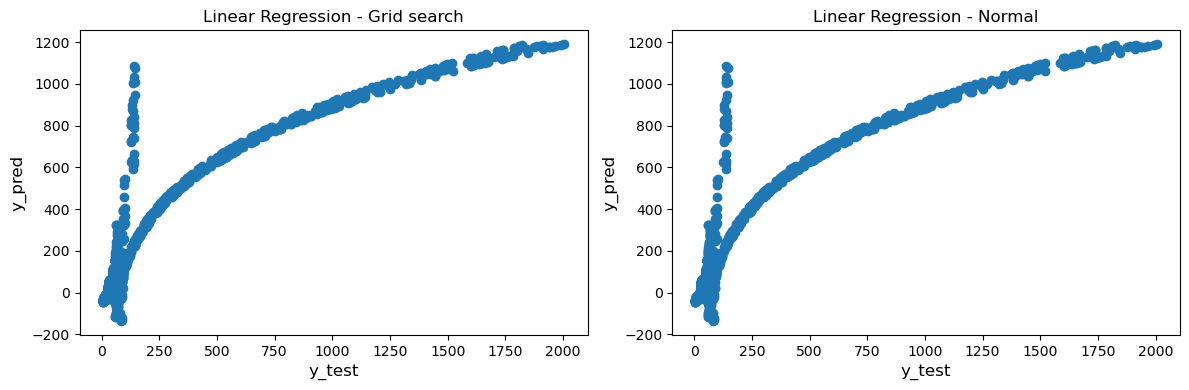

In [75]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].scatter(y_test, LNG_y_pred)
axes[1].scatter(y_test, LN_y_pred)
axes[0].set_title('Linear Regression - Grid search', fontsize=12)
axes[1].set_title('Linear Regression - Normal', fontsize=12)
axes[0].set_xlabel('y_test', fontsize=12)
axes[0].set_ylabel('y_pred', fontsize=12)
axes[1].set_xlabel('y_test', fontsize=12)
axes[1].set_ylabel('y_pred', fontsize=12)
fig.tight_layout()

### Results

Linear Regression using Grid Search<br>

Kaggle Score: 72.5261<br>
Local Score: 79.6087<br>

Linear Regression using Normal Parameters<br>

Kaggle Score: 72.5261<br>
Local Score: 79.6087

### Random Fores Regressor <a class="anchor" id="8.3"></a>
Random Forest Regressor is a machine learning algorithm used to predict continuous values. It is commonly used to solve business problems such as predicting future prices or costs. Random Forest Regressor is a powerful algorithm that combines multiple decision trees to create an ensemble model. It can handle missing values, outliers, and high-dimensional data, making it suitable for a wide range of problems.

##### Initial Parameters

To improve our model, it's crucial to identify the most effective hyperparameters to use.


In [76]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2010, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# First create the base model to tune
RFR = RandomForestRegressor()

#### Randomized Search CV

Randomized Search CV is a hyperparameter tuning method that explores a range of hyperparameter values by randomly selecting combinations to evaluate, searching for the best set of hyperparameters that optimize the model's performance on a validation set.


In [77]:
best_estimators = randomized_search_cv(RFR, random_grid, X_train, y_train)
RFR_R = best_estimators
RFR_R.fit(X_train, y_train)
RFR_R_y_pred = RFR_R.predict(X_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=803; total time=  31.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=803; total time=  31.9s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1004; total time=  35.5s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1607; total time=  35.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=803; total time=  26.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=803; total time=  31.8s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1

In [78]:
print('Randomized Search - Random Fores Regressor')
model_error(y_test,RFR_R_y_pred) 

Randomized Search - Random Fores Regressor
performance:  -4.7630661089754796
MAE:  0.3208508219114545
R2:  0.9998328056357548
MSE:  5.762898914611235
RMSE:  2.400603864574752


#### Normal Execution

In [79]:
RFR_N = random_forest_regressor(X_train, y_train)
RFR_N_y_pred = RFR_N.predict(X_test)
print('Normal - Random Fores Regressor')
model_error(y_test,RFR_N_y_pred)

Normal - Random Fores Regressor
performance:  -3.8985704545117894
MAE:  0.2910693029516395
R2:  0.9998578858272029
MSE:  4.8984283403389925
RMSE:  2.2132393319157764


#### Feature Importance
Weight, Carrier_C and Carrier_D has great relevance in the prediction.

In [80]:
feature_importance(RFR_R, X_train)

Column: weight 	 Score: 0.9170072342844009
Column: carrier_C 	 Score: 0.051697129766886486
Column: carrier_D 	 Score: 0.029368151279656002
Column: epoch_times 	 Score: 0.0014471549685370806
Column: carrier_A 	 Score: 0.00034961918354069345
Column: distance 	 Score: 7.101855106943066e-05
Column: carrier_B 	 Score: 4.7917581777495315e-05
Column: exWeatherTag_heat 	 Score: 5.685276083378802e-06
Column: exWeatherTag_snow 	 Score: 5.493882550292293e-06
Column: packageType_standar 	 Score: 3.059287159853876e-07
Column: packageType_TT 	 Score: 2.8929678222026303e-07


#### Feature Importance
PackageType, Carrier_C and Carrier_D has great relevance in the prediction.

In [81]:
feature_importance(RFR_N, X_train)

Column: weight 	 Score: 0.9162807375042145
Column: carrier_C 	 Score: 0.05632907684011864
Column: carrier_D 	 Score: 0.025424343693247694
Column: epoch_times 	 Score: 0.001479232393962606
Column: carrier_A 	 Score: 0.0003475173027604304
Column: distance 	 Score: 8.05769895404062e-05
Column: carrier_B 	 Score: 4.467557477430415e-05
Column: exWeatherTag_snow 	 Score: 7.277299116816586e-06
Column: exWeatherTag_heat 	 Score: 5.944986832507305e-06
Column: packageType_standar 	 Score: 3.1996529692357874e-07
Column: packageType_TT 	 Score: 2.974501350794434e-07


#### Export Results

In [82]:
RFR_R_y_pred_f = RFR_R.predict(t1)
RFR_N_y_pred_f = RFR_N.predict(t1)
export_result(RFR_R_y_pred_f,df_test,"Test15 RFR - Randomized")
export_result(RFR_N_y_pred_f,df_test,"Test15 RFR - Normal")

#### Graph Error

The error scatter plot shows a linear behavior with a relatively low dispersion, which indicates a good prediction and a consistent and predictable distribution. The model with Randomized Search Cv presents a greater dispersion in the highest values.


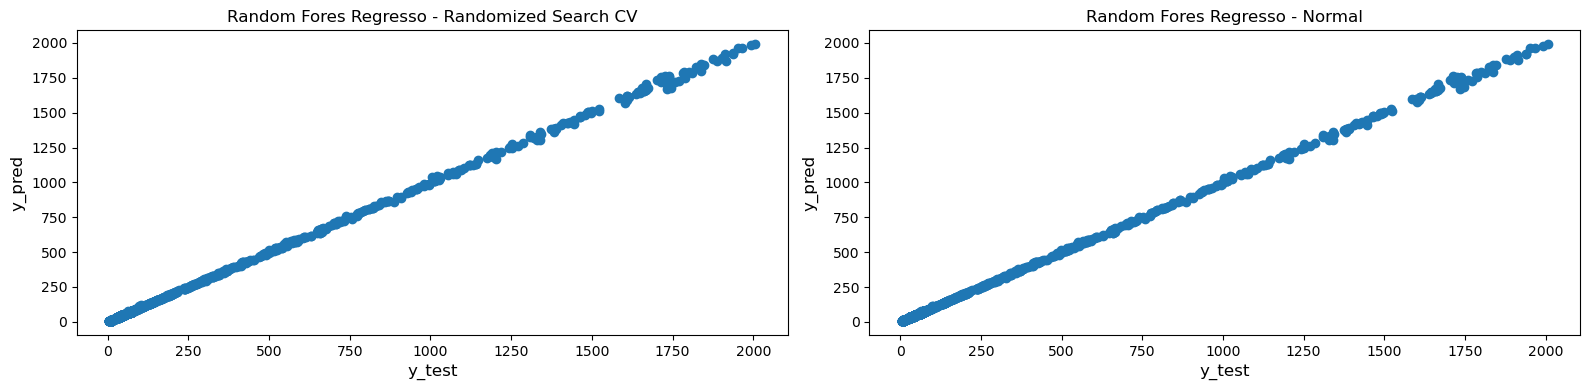

In [83]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].scatter(y_test,RFR_R_y_pred)
axes[1].scatter(y_test,RFR_N_y_pred)
axes[0].set_title('Random Fores Regresso - Randomized Search CV', fontsize=12)
axes[1].set_title('Random Fores Regresso - Normal', fontsize=12)
axes[0].set_xlabel('y_test', fontsize=12)
axes[0].set_ylabel('y_pred', fontsize=12)
axes[1].set_xlabel('y_test', fontsize=12)
axes[1].set_ylabel('y_pred', fontsize=12)
fig.tight_layout()

### Results

Random Forest Regressor using Randomized Search CV<br>

Kaggle Score: 1.9495<br>
Local Score: 2.4006<br>

Random Forest Regressor using Normal Parameters<br>

Kaggle Score: 1.7451<br>
Local Score: 2.2132

### Gradient Boosting Regressor <a class="anchor" id="8.4"></a>

Gradient Boosting Regressor is a machine learning algorithm used to build regression models that are capable of capturing nonlinear relationships between the target variable and features. It can handle missing values, outliers, and high cardinality categorical features without any special preprocessing. Gradient Boosting Regressor is a powerful algorithm that can achieve high accuracy and has good usability for a wide range of problems.

##### Initial Parameters

To improve our model, it's crucial to identify the most effective hyperparameters to use.

In [84]:
param_grid_GBR = {
    'n_estimators': [50, 100,500],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
}

# First create the base model to tune
GBR = GradientBoostingRegressor()

#### Grid search

Grid search involves specifying a grid of potential values for each hyperparameter, and then exhaustively searching through the grid to determine the combination of hyperparameters that yields the best performance of the model on a validation set.


In [85]:
bestest_GBR = grid_search_cv(GBR, param_grid_GBR, X_train, y_train)
GBR_G = bestest_GBR
GBR_G.fit(X_train, y_train)
GBR_G_y_pred = GBR_G.predict(X_test)

Best Params:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best Estimators GradientBoostingRegressor(max_depth=4, n_estimators=500)
Accuracy Score: 0.9999909541155828


In [86]:
print('Grid Search - GBR Regression')
model_error(y_test,GBR_G_y_pred) 

Grid Search - GBR Regression
performance:  -0.9217771785288646
MAE:  0.34564884656113964
R2:  0.9999442466375521
MSE:  1.9217214251664168
RMSE:  1.3862616726889685


#### Normal Execution

In [87]:
GBR_N = GBR.fit(X_train, y_train)
GBR_N_y_pred = GBR_N.predict(X_test)
print('Normal - GBR Regressor')
model_error(y_test,GBR_N_y_pred)

Normal - GBR Regressor
performance:  -18.194891396769396
MAE:  1.4544459038476398
R2:  0.9994431301666246
MSE:  19.19433452693602
RMSE:  4.381133931636423


#### Feature Importance
Weight, Carrier_C and Carrier_C has great relevance in the prediction.

In [88]:
feature_importance(GBR_G, X_train)

Column: weight 	 Score: 0.9145401372544827
Column: carrier_C 	 Score: 0.057439187147953194
Column: carrier_D 	 Score: 0.025871016006666674
Column: epoch_times 	 Score: 0.0016933927831101789
Column: carrier_A 	 Score: 0.00041925645092335775
Column: carrier_B 	 Score: 2.904391466597318e-05
Column: distance 	 Score: 6.337582828513955e-06
Column: exWeatherTag_heat 	 Score: 1.0710122840115788e-06
Column: exWeatherTag_snow 	 Score: 3.3082846143752506e-07
Column: packageType_standar 	 Score: 2.2701862405313034e-07


#### Feature Importance
Weight, Carrier_C and Carrier_C has great relevance in the prediction.

In [89]:
feature_importance(GBR_N, X_train)

Column: weight 	 Score: 0.9125138890261721
Column: carrier_C 	 Score: 0.047823628794773025
Column: carrier_D 	 Score: 0.03765632219583937
Column: epoch_times 	 Score: 0.0015372667236542956
Column: carrier_A 	 Score: 0.00043242223564523283
Column: carrier_B 	 Score: 3.531477562347485e-05
Column: distance 	 Score: 1.040624635725753e-06
Column: exWeatherTag_snow 	 Score: 8.278971826693978e-08
Column: exWeatherTag_heat 	 Score: 3.283393847287873e-08


#### Export Results

In [90]:
GBR_G_y_pred_f = GBR_G.predict(t1)
GBR_N_y_pred_f = GBR_N.predict(t1)
export_result(GBR_G_y_pred_f,df_test,"Test15 GBR - Gridsearch")
export_result(GBR_N_y_pred_f,df_test,"Test15 GBR - Normal")

#### Graph Error ***

The error dispersion graph shows in both cases a linear behavior without a very accentuated dispersion, which indicates a not very high difference in the error between the two variables, the XGB regressor graph in high values presents a greater dispersion than the model normal

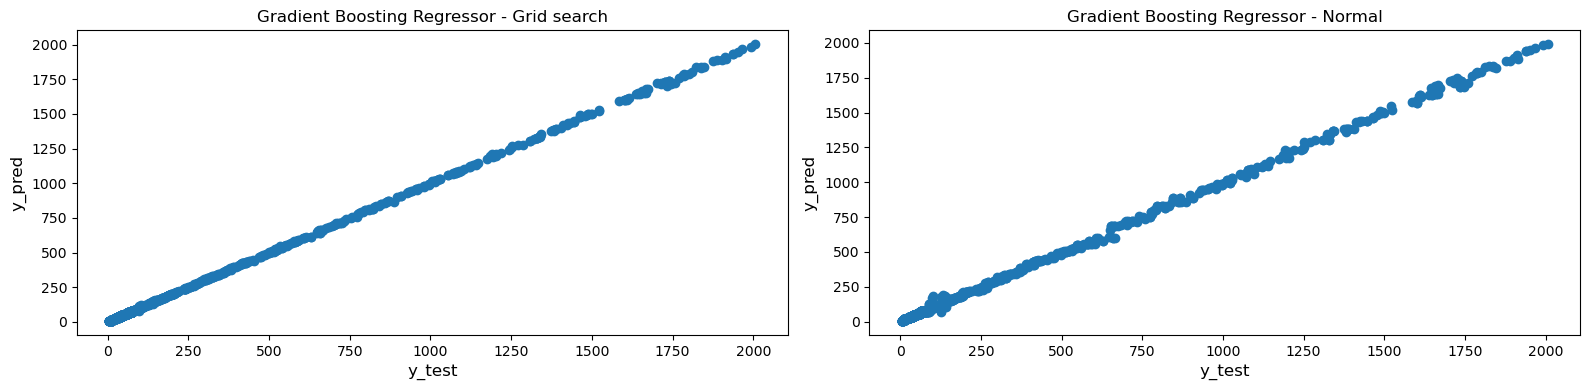

In [91]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].scatter(y_test,GBR_G_y_pred)
axes[1].scatter(y_test,GBR_N_y_pred)
axes[0].set_title('Gradient Boosting Regressor - Grid search', fontsize=12)
axes[1].set_title('Gradient Boosting Regressor - Normal', fontsize=12)
axes[0].set_xlabel('y_test', fontsize=12)
axes[0].set_ylabel('y_pred', fontsize=12)
axes[1].set_xlabel('y_test', fontsize=12)
axes[1].set_ylabel('y_pred', fontsize=12)
fig.tight_layout()

#### Results
Gradient Boosting Regressor using Grid Search CV<br>
Kaggle Score: 1.6170 <br>
Local Score: 1.3862<br>
Gradient Boosting Regressor using Normal Parameters<br>
Kaggle Score: 1.9481<br>
Local Score: 4.3811

### XGB Regressor  <a class="anchor" id="8.5"></a>

XGBoost is also know as custom tree building algorithm. It is sequential model. Each sub tree is dependent on the outcome of the previous tree.
XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

##### Initial Parameters

To improve our model, it's crucial to identify the most effective hyperparameters to use.

In [92]:
param_grid_XGB = {   'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 500],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.1, 1, 10]}
XGB = XGBRegressor()

#### Randomized Search CV
Randomized Search CV is a hyperparameter tuning method that explores a range of hyperparameter values by randomly selecting combinations to evaluate, searching for the best set of hyperparameters that optimize the model's performance on a validation set.


In [93]:
bestest_XGB = randomized_search_cv(XGB, param_grid_XGB, X_train, y_train)
XGB_R = bestest_XGB
XGB_R.fit(X_train, y_train)
XGB_R_y_pred = XGB_R.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Estimators XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=0.1, ...)
Accuracy Score: -1.0315454257253436


In [94]:
print('Randomized Search - XGB Regression')
model_error(y_test,XGB_R_y_pred) 

Randomized Search - XGB Regression
performance:  -6.196628770351338
MAE:  1.1552768986177324
R2:  0.999791216038613
MSE:  7.196419986389951
RMSE:  2.6826143939056823


#### Normal Execution

In [95]:
XGB_N = XGB.fit(X_train, y_train)
XGB_N_y_pred = XGB_N.predict(X_test)
print('Normal - XGB Regressor')
model_error(y_test,XGB_N_y_pred)

Normal - XGB Regressor
performance:  -1.5943794961869617
MAE:  0.35387395390418064
R2:  0.999924733532069
MSE:  2.5943042297190306
RMSE:  1.6106843979250034


#### Feature Importance

#### Feature Importance
Weight, Carrier_C and Carrier_D has great relevance in the prediction.

In [96]:
feature_importance(XGB_N, X_train)

Column: weight 	 Score: 0.5733982
Column: carrier_C 	 Score: 0.38911453
Column: carrier_D 	 Score: 0.03012067
Column: carrier_A 	 Score: 0.0047754147
Column: epoch_times 	 Score: 0.0011351075
Column: carrier_B 	 Score: 0.0009997095
Column: distance 	 Score: 0.00033417114
Column: exWeatherTag_heat 	 Score: 0.0001222085


#### Feature Importance
Weight, Carrier_C and Carrier_D has great relevance in the prediction.

In [97]:
feature_importance(XGB_R, X_train)

Column: packageType_TT 	 Score: 0.4855601
Column: weight 	 Score: 0.2608036
Column: carrier_C 	 Score: 0.13496572
Column: packageType_standar 	 Score: 0.07549094
Column: carrier_D 	 Score: 0.03313381
Column: carrier_A 	 Score: 0.0049451943
Column: epoch_times 	 Score: 0.0022248882
Column: carrier_B 	 Score: 0.0016318742
Column: distance 	 Score: 0.0009964859
Column: exWeatherTag_heat 	 Score: 0.00022502975
Column: exWeatherTag_snow 	 Score: 2.23086e-05


#### Export Results

In [98]:
XGB_R_y_pred_f = XGB_R.predict(t1)
XGB_N_y_pred_f = XGB_N.predict(t1)
export_result(XGB_R_y_pred_f,df_test,"Test18 XGB - Randomized")
export_result(XGB_N_y_pred_f,df_test,"Test18 XGB - Normal")

#### Graph Error

The error dispersion graph shows in both cases a linear behavior without a very accentuated dispersion, which indicates a not very high difference in the error between the two variables, the XGB regressor graph in high values presents a greater dispersion than the model normal

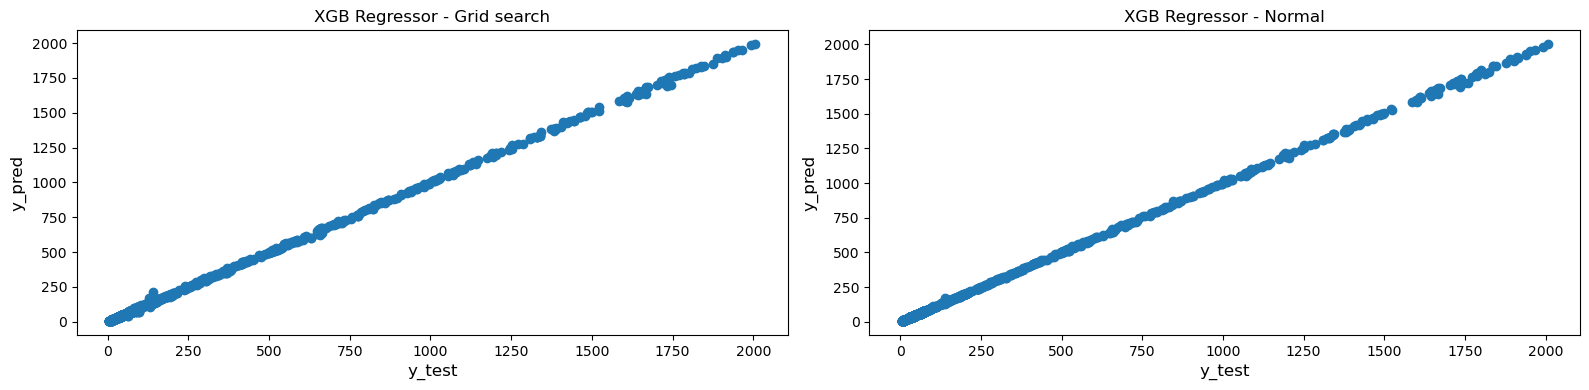

[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1406; total time= 1.4min
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=803; total time=  46.6s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=401; total time=  34.9s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=401; total time=  35.4s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=401; total time=  35.3s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1205; total time= 1.8min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1607; total time= 1.1min
[CV] END bootstrap=False, max_depth=10, 

In [99]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].scatter(y_test,XGB_R_y_pred)
axes[1].scatter(y_test,XGB_N_y_pred)
axes[0].set_title('XGB Regressor - Grid search', fontsize=12)
axes[1].set_title('XGB Regressor - Normal', fontsize=12)
axes[0].set_xlabel('y_test', fontsize=12)
axes[0].set_ylabel('y_pred', fontsize=12)
axes[1].set_xlabel('y_test', fontsize=12)
axes[1].set_ylabel('y_pred', fontsize=12)
fig.tight_layout()

### Results

XGBoost Regressor using Randomized Search CV

Kaggle Score: 2.8624<br>
Local Score: 2.6826<br>

XGBoost Regressor using Normal Parameters<br>

Kaggle Score: 1.8209<br>
Local Score: 1.6106

### Conclusion

We have experimented with four algorithms: Random Forest Regressor, XGBoost Regressor, Gradient Boosting Regressor, and Linear Regressor. Among these, the Gradient Boosting Regressor using Grid Search CV to tune hyperparameters achieved the best accuracy. The RMSE on the test dataset was 1.6170.

The accuracy of the Random Forest Regressor, XGBoost Regressor, and Gradient Boosting Regressor models was acceptable compared to the linear regression model. This suggests that the linear regression model may not be the most suitable for the objective of this exercise.

In the Random Forest Regressor and XGBoost Regressor models, hyperparameter tuning techniques did not improve the results compared to the default model features. This could be due to improper selection of training parameters. However, in the Gradient Boosting Regressor model, the Grid Search CV hyperparameter tuning technique was used, resulting in an improvement in the model’s accuracy. This suggests that Grid Search CV is a more robust technique for hyperparameter selection